## Predicting Income Per Capita

### A Multilinear Regression Model

*by Charles Pryor & Akshay Indusekar*

We started by importing all of the necessary packages that we knew we would need.  I keep these in a separate file and import all of them at the same time whenever there is a project.

In [218]:
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle
import itertools
import scipy
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score 
from statistics import mean 
from sklearn.preprocessing import StandardScaler, power_transform, PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import statsmodels.api as sm
%matplotlib inline

We found our data set on Kaggle.  This reflects the variables in which we want to produce a model that will predict income by state and several variables in which we ultimately decided upon as we perform metrics which tell us which is relevant.  We imported our data into pandas DataFrame.  From here on out, I will use the present tense.

In [2]:
df = pd.read_csv('acs2017_census_tract_data.csv')
df

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72153750501,Puerto Rico,Yauco Municipio,6011,3035,2976,99.7,0.3,0.0,0.0,...,0.5,0.0,3.6,26.9,1576,59.2,33.8,7.0,0.0,20.8
73997,72153750502,Puerto Rico,Yauco Municipio,2342,959,1383,99.1,0.9,0.0,0.0,...,0.0,0.0,1.3,25.3,666,58.4,35.4,6.2,0.0,26.3
73998,72153750503,Puerto Rico,Yauco Municipio,2218,1001,1217,99.5,0.2,0.0,0.0,...,3.4,0.0,3.4,23.5,560,57.5,34.5,8.0,0.0,23.0
73999,72153750601,Puerto Rico,Yauco Municipio,4380,1964,2416,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,24.1,1062,67.7,30.4,1.9,0.0,29.5


We start to analyze our data set.  Here we wish to see if our set includes all of the states.  The original data set has 74,001 rows and 37 columns.  It is here that we can also see the spread of the columns.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
TractId             74001 non-null int64
State               74001 non-null object
County              74001 non-null object
TotalPop            74001 non-null int64
Men                 74001 non-null int64
Women               74001 non-null int64
Hispanic            73305 non-null float64
White               73305 non-null float64
Black               73305 non-null float64
Native              73305 non-null float64
Asian               73305 non-null float64
Pacific             73305 non-null float64
VotingAgeCitizen    74001 non-null int64
Income              72885 non-null float64
IncomeErr           72885 non-null float64
IncomePerCap        73256 non-null float64
IncomePerCapErr     73256 non-null float64
Poverty             73159 non-null float64
ChildPoverty        72891 non-null float64
Professional        73190 non-null float64
Service             73190 non-null float64


It is imperative that we see a true representation of all states in the Union since we are predicting salary by each state.

In [4]:
df.State.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

We now check for null values in our data set.

In [5]:
df.isnull().sum()

TractId                0
State                  0
County                 0
TotalPop               0
Men                    0
Women                  0
Hispanic             696
White                696
Black                696
Native               696
Asian                696
Pacific              696
VotingAgeCitizen       0
Income              1116
IncomeErr           1116
IncomePerCap         745
IncomePerCapErr      745
Poverty              842
ChildPoverty        1110
Professional         811
Service              811
Office               811
Construction         811
Production           811
Drive                801
Carpool              801
Transit              801
Walk                 801
OtherTransp          801
WorkAtHome           801
MeanCommute          946
Employed               0
PrivateWork          811
PublicWork           811
SelfEmployed         811
FamilyWork           811
Unemployment         810
dtype: int64

We see that we have many columns with null values.  Being that we have a data set with over 74,000 rows, we decided to drop all of the rows containing null values.

In [6]:
df = df[df['Income'].notna()]
df = df[df['ChildPoverty'].notna()]
df = df[df['MeanCommute'].notna()]

We then check to see if our data cleaned properly.

In [8]:
df.isnull().sum()

TractId             0
State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        0
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

We now must decide what to do with our outliers.  We must do this so that when we design our model, it will show positive linear relationships.  We decided to use just one feature, df1['Office] to cleanse our data of outliers.

In [10]:
x_cols = df.columns.tolist()

In [11]:
del x_cols[0]
x_cols

['State',
 'County',
 'TotalPop',
 'Men',
 'Women',
 'Hispanic',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific',
 'VotingAgeCitizen',
 'Income',
 'IncomeErr',
 'IncomePerCap',
 'IncomePerCapErr',
 'Poverty',
 'ChildPoverty',
 'Professional',
 'Service',
 'Office',
 'Construction',
 'Production',
 'Drive',
 'Carpool',
 'Transit',
 'Walk',
 'OtherTransp',
 'WorkAtHome',
 'MeanCommute',
 'Employed',
 'PrivateWork',
 'PublicWork',
 'SelfEmployed',
 'FamilyWork',
 'Unemployment']

In [251]:
df1.duplicated().sum()

0

In [34]:
df1 = df[['IncomePerCap',
       'Poverty',
       'ChildPoverty', 'Professional', 'Service','Construction', 'Office', 
       'Production']]
df1

,IncomePerCap,Poverty,ChildPoverty,Professional,Service,Construction,Office,Production
0,33018.0,10.7,20.8,38.5,15.6,10.8,22.8,12.4
1,18996.0,22.4,35.8,30.5,24.9,6.3,22.9,15.4
2,21236.0,14.7,21.1,27.9,19.4,9.9,33.3,9.6
3,28068.0,2.3,1.7,29.0,16.6,9.1,25.8,19.5
4,36905.0,12.2,17.9,48.8,13.8,3.5,20.5,13.4
...,...,...,...,...,...,...,...,...
73996,8643.0,39.4,61.8,42.2,25.3,7.7,18.0,6.9
73997,11109.0,35.5,39.9,34.4,13.4,12.3,23.1,16.8
73998,9603.0,52.8,77.2,29.3,23.6,4.6,32.9,9.6
73999,8331.0,50.1,58.0,29.8,20.6,13.9,28.8,6.9


In [35]:
df1

,IncomePerCap,Poverty,ChildPoverty,Professional,Service,Construction,Office,Production
0,33018.0,10.7,20.8,38.5,15.6,10.8,22.8,12.4
1,18996.0,22.4,35.8,30.5,24.9,6.3,22.9,15.4
2,21236.0,14.7,21.1,27.9,19.4,9.9,33.3,9.6
3,28068.0,2.3,1.7,29.0,16.6,9.1,25.8,19.5
4,36905.0,12.2,17.9,48.8,13.8,3.5,20.5,13.4
...,...,...,...,...,...,...,...,...
73996,8643.0,39.4,61.8,42.2,25.3,7.7,18.0,6.9
73997,11109.0,35.5,39.9,34.4,13.4,12.3,23.1,16.8
73998,9603.0,52.8,77.2,29.3,23.6,4.6,32.9,9.6
73999,8331.0,50.1,58.0,29.8,20.6,13.9,28.8,6.9


In [18]:
df1.isnull().sum()

Poverty         0
ChildPoverty    0
Professional    0
Service         0
Construction    0
Office          0
Production      0
dtype: int64

In [19]:
df2 = df.groupby(["State"]).sum().head(85)
df2.sort_values(by = 'IncomePerCap').sum()

TractId             2.063222e+15
TotalPop            3.231214e+08
Men                 1.588425e+08
Women               1.642789e+08
Hispanic            1.256782e+06
White               4.460314e+06
Black               9.638347e+05
Native              5.292240e+04
Asian               3.455893e+05
Pacific             1.062280e+04
VotingAgeCitizen    2.284190e+08
Income              4.444524e+09
IncomeErr           7.046611e+08
IncomePerCap        2.230018e+09
IncomePerCapErr     3.090316e+08
Poverty             1.166886e+06
ChildPoverty        1.537875e+06
Professional        2.585402e+06
Service             1.370585e+06
Office              1.702559e+06
Construction        6.735900e+05
Production          9.396847e+05
Drive               5.517902e+06
Carpool             6.780631e+05
Transit             3.905382e+05
Walk                2.127567e+05
OtherTransp         1.371517e+05
WorkAtHome          3.354224e+05
MeanCommute         1.896510e+06
Employed            1.513486e+08
PrivateWor

In [20]:

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)


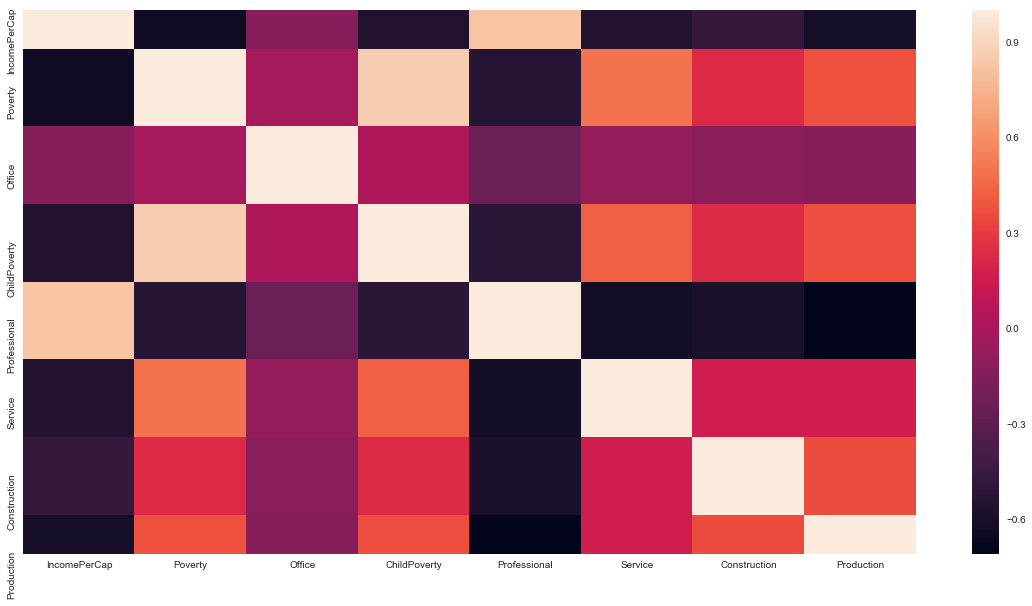

In [427]:
# plot the heatmap
corr = df_filtered.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

In [470]:
corr

,IncomePerCap,Poverty,Office,ChildPoverty,Professional,Service,Construction,Production
IncomePerCap,1.000000,-0.642656,-0.130021,-0.563883,0.825552,-0.554342,-0.474278,-0.604983
Poverty,-0.642656,1.000000,-0.005198,0.862065,-0.537256,0.497446,0.230764,0.382425
Office,-0.130021,-0.005198,1.000000,0.021287,-0.238682,-0.079610,-0.117162,-0.121765
ChildPoverty,-0.563883,0.862065,0.021287,1.000000,-0.509756,0.430090,0.237659,0.370664
Professional,0.825552,-0.537256,-0.238682,-0.509756,1.000000,-0.623051,-0.591481,-0.708473
Service,-0.554342,0.497446,-0.079610,0.430090,-0.623051,1.000000,0.163088,0.170872
Construction,-0.474278,0.230764,-0.117162,0.237659,-0.591481,0.163088,1.000000,0.363271
Production,-0.604983,0.382425,-0.121765,0.370664,-0.708473,0.170872,0.363271,1.000000


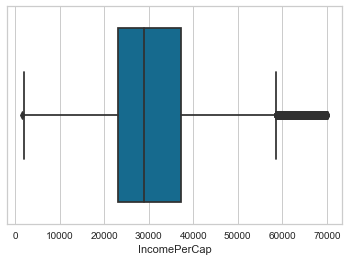

In [429]:
sns.boxplot(df_filtered.IncomePerCap)

In [515]:
y = df_filtered['IncomePerCap']
scaler = StandardScaler()
np.array(df_filtered).reshape(-1,1)

array([[ 0.146797  ],
       [-0.22532993],
       [-0.1763    ],
       ...,
       [-0.33374635],
       [-0.59601269],
       [ 0.01568959]])

In [508]:
scaler.fit(df_filtered)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [509]:
y.values.reshape(-1,1)

array([[ 0.146797  ],
       [-1.08972235],
       [-0.89218966],
       ...,
       [-1.82429703],
       [-1.75648335],
       [-1.82641345]])

In [510]:
transformed_data = scaler.transform(df_filtered)
transformed_data

array([[ 0.14679824, -0.22533183, -0.17630149, ..., -0.33374916,
         0.38722255, -0.04000102],
       [-1.08973153,  1.37329402, -0.15687604, ...,  1.05377477,
        -0.5541777 ,  0.3776795 ],
       [-0.89219718,  0.32120693,  1.86337062, ...,  0.2331961 ,
         0.1989425 , -0.42983616],
       ...,
       [-1.82431241,  2.16577521,  0.21220749, ...,  1.48644352,
        -0.24037761, -0.61083105],
       [-1.75649816,  2.3024099 , -2.54620622, ...,  2.88888706,
         1.24494278, -0.52729495],
       [-1.82642885,  2.3024099 ,  0.93094909, ..., -0.33374916,
        -0.59601771,  0.01568972]])

In [511]:
transformed_data
lasso_reg = Lasso()

In [512]:
lasso_reg.fit(transformed_data, y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [513]:
print(lasso_reg.coef_)


[ 0. -0. -0. -0.  0. -0. -0. -0.]


In [250]:
lasso_reg.predict(scaler.transform(np.array([8, 17, 40, 10,25,20,5])))

ValueError: Expected 2D array, got 1D array instead:
array=[ 8. 17. 40. 10. 25. 20.  5.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [516]:
df1 = df[[ 'IncomePerCap','Poverty','Office',
       'ChildPoverty', 'Professional', 'Service','Construction', 
       'Production']]
df1

,IncomePerCap,Poverty,Office,ChildPoverty,Professional,Service,Construction,Production
0,33018.0,10.7,22.8,20.8,38.5,15.6,10.8,12.4
1,18996.0,22.4,22.9,35.8,30.5,24.9,6.3,15.4
2,21236.0,14.7,33.3,21.1,27.9,19.4,9.9,9.6
3,28068.0,2.3,25.8,1.7,29.0,16.6,9.1,19.5
4,36905.0,12.2,20.5,17.9,48.8,13.8,3.5,13.4
...,...,...,...,...,...,...,...,...
73996,8643.0,39.4,18.0,61.8,42.2,25.3,7.7,6.9
73997,11109.0,35.5,23.1,39.9,34.4,13.4,12.3,16.8
73998,9603.0,52.8,32.9,77.2,29.3,23.6,4.6,9.6
73999,8331.0,50.1,28.8,58.0,29.8,20.6,13.9,6.9


In [518]:
df_filtered = df1[(df1['Office'] >= 10) & (df1['Office'] <= 45)& (df1['Service'] <= 50) & (df1['Poverty'] <= 45) & (df1['Construction'] <= 22) & (df1['IncomePerCap'] <= 70000)]
df_filtered

,IncomePerCap,Poverty,Office,ChildPoverty,Professional,Service,Construction,Production
0,33018.0,10.7,22.8,20.8,38.5,15.6,10.8,12.4
1,18996.0,22.4,22.9,35.8,30.5,24.9,6.3,15.4
2,21236.0,14.7,33.3,21.1,27.9,19.4,9.9,9.6
3,28068.0,2.3,25.8,1.7,29.0,16.6,9.1,19.5
4,36905.0,12.2,20.5,17.9,48.8,13.8,3.5,13.4
...,...,...,...,...,...,...,...,...
73983,8133.0,42.4,21.2,52.7,12.7,31.9,9.2,25.0
73988,10930.0,43.6,18.3,55.2,31.3,29.8,12.0,8.5
73994,10642.0,29.2,28.5,33.4,37.0,15.6,6.1,12.8
73996,8643.0,39.4,18.0,61.8,42.2,25.3,7.7,6.9


In [519]:
df_filtered.describe()

,IncomePerCap,Poverty,Office,ChildPoverty,Professional,Service,Construction,Production
count,65696.000000,65696.000000,65696.000000,65696.000000,65696.000000,65696.000000,65696.000000,65696.000000
mean,29929.306959,14.663590,23.699062,19.622673,35.539870,18.717611,8.950382,13.093258
std,11723.239158,9.992515,5.243215,16.291147,13.694102,7.340579,4.824538,7.420339
min,1631.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21470.750000,6.900000,20.100000,6.300000,25.500000,13.500000,5.200000,7.400000
50%,27650.000000,12.200000,23.500000,15.700000,33.700000,17.700000,8.400000,12.000000
75%,36106.000000,20.300000,27.000000,29.600000,44.400000,22.900000,12.200000,17.500000
max,69993.000000,45.000000,45.000000,100.000000,85.500000,50.000000,22.000000,60.500000


In [520]:
y = df_filtered['IncomePerCap']
X = df_filtered[refined_cols]

In [521]:
y.values.reshape(-1,1)


array([[33018.],
       [18996.],
       [21236.],
       ...,
       [10642.],
       [ 8643.],
       [11109.]])

In [522]:
y = power_transform(_, method = 'box-cox')

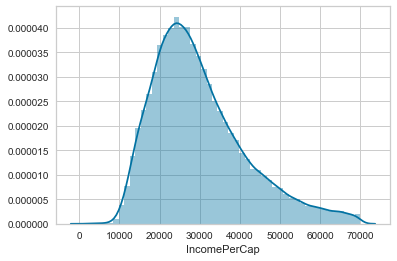

In [523]:
sns.distplot(df_filtered['IncomePerCap'])

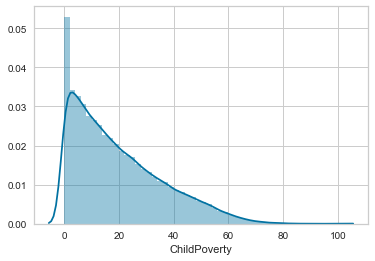

In [524]:
sns.distplot(df_filtered['ChildPoverty'])

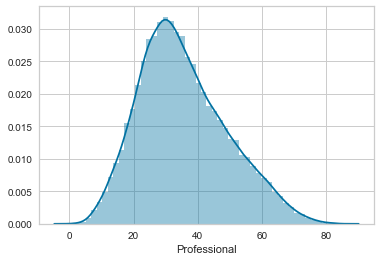

In [525]:
sns.distplot(df_filtered['Professional'])

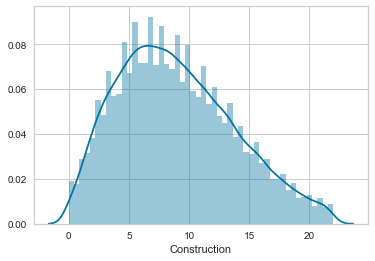

In [526]:
sns.distplot(df_filtered['Construction'])

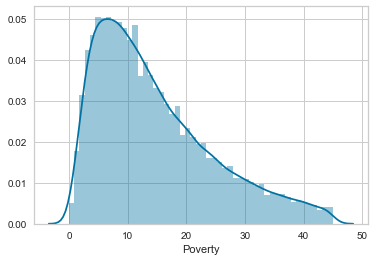

In [527]:
sns.distplot(df_filtered['Poverty'])

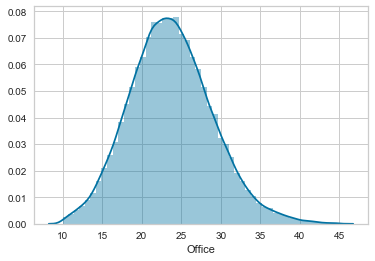

In [528]:
sns.distplot(df_filtered['Office'])
plt.show()

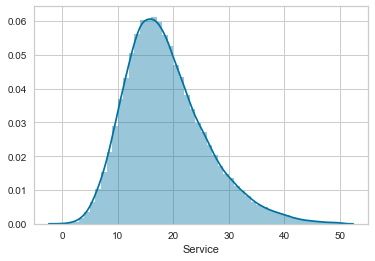

In [529]:
sns.distplot(df_filtered['Service'])
plt.show()

In [530]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X**2, y, test_size=0.2, random_state = 45)

In [531]:
ss = StandardScaler()
scaledxtrain = ss.fit_transform(X_train)
scaledxtest = ss.transform(X_test)

In [532]:
#X = df[refined_cols]
X2 = sm.add_constant(scaledxtest)
model = sm.OLS(y_test, X2, hasconst= True)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     8074.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:31:00   Log-Likelihood:                -8504.4
No. Observations:               13140   AIC:                         1.702e+04
Df Residuals:                   13133   BIC:                         1.708e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0061      0.004      1.519      0.129      -0.002       0.014
x1            -0.3950      0.005    -79.987      0.000      -0.405      -0.385
x2            -0.0091      0.006     -1.542      0.123      -0.021       0.002
x3             0.5027      0.009     53.173      0.000       0.484       0.521
x4            -0.0836      0.007    -11.984      0.000      -0.097      -0.070
x5            -0.0564      0.006     -9.795      0.000      -0.068      -0.045
x6            -0.1026      0.006    -16.140      0.000      -0.115      -0.090
==============================================================================
Omnibus:                      776.296   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3036.993
Skew:                          -0.158   Prob(JB):                         0.00
Kurtosis:                       5.334   Cond. No.                         5.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [533]:
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(scaledxtrain, y_train)
y_predict = lr.predict(scaledxtest)
r_squared = r2_score(y_test, y_predict)
print(r_squared)

0.7864656304902553


In [458]:
x_cols

['IncomePerCap',
 'Poverty',
 'Office',
 'ChildPoverty',
 'Professional',
 'Service',
 'Construction',
 'Production']

In [480]:
x_cols = df_filtered.columns.tolist()


In [196]:
del x_cols[0]

In [481]:

for col in x_cols:
    ## This is called standard scaling
    ## Here we don't have to do this but still it is a good practice
    df_filtered[col] = (df_filtered[col] - df_filtered[col].mean())/df_filtered[col].std()
df_filtered.head()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,IncomePerCap,Poverty,Office,ChildPoverty,Professional,Service,Construction,Production
0,0.146797,-0.225330,-0.176300,0.333486,0.126165,-0.333746,0.387219,-0.040001
1,-1.089722,1.373282,-0.156875,1.480726,-0.474389,1.053766,-0.554173,0.377676
2,-0.892190,0.321204,1.863355,0.356431,-0.669568,0.233194,0.198941,-0.429833
3,-0.289715,-1.373052,0.406459,-1.127332,-0.586992,-0.184551,0.031582,0.948502
4,0.489569,-0.020380,-0.623082,0.111687,0.899377,-0.602297,-1.139928,0.099225


In [198]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72718 entries, 0 to 74000
Data columns (total 8 columns):
IncomePerCap    72718 non-null float64
Poverty         72718 non-null float64
ChildPoverty    72718 non-null float64
Professional    72718 non-null float64
Service         72718 non-null float64
Construction    72718 non-null float64
Office          72718 non-null float64
Production      72718 non-null float64
dtypes: float64(8)
memory usage: 5.0 MB


In [38]:
!pip install yellowbrick

Note about office

In [534]:
refined_cols = ['Poverty','Office',
        'Professional', 'Service','Construction', 
       'Production']
X = df_filtered[refined_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(refined_cols, vif))

[('Poverty', 5.212861647548597),
 ('Office', 12.692497342824135),
 ('Professional', 5.428544083589638),
 ('Service', 9.20770956668878),
 ('Construction', 4.682379567137412),
 ('Production', 5.042263448907262)]

In [535]:
X = df_filtered[refined_cols]
X = sm.add_constant(X.values)
model = sm.OLS(y, X, hasconst= True)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                 4.386e+04
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:31:25   Log-Likelihood:                -40310.
No. Observations:               65696   AIC:                         8.063e+04
Df Residuals:                   65689   BIC:                         8.070e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5935      2.703      0.220      0.826      -4.704       5.891
x1            -0.0430      0.000   -191.574      0.000      -0.043      -0.043
x2            -0.0109      0.027     -0.402      0.688      -0.064       0.042
x3             0.0266      0.027      0.985      0.325      -0.026       0.080
x4            -0.0145      0.027     -0.537      0.591      -0.067       0.038
x5            -0.0155      0.027     -0.575      0.565      -0.069       0.037
x6            -0.0184      0.027     -0.682      0.495      -0.071       0.035
==============================================================================
Omnibus:                    11365.216   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96101.622
Skew:                          -0.593   Prob(JB):                         0.00
Kurtosis:                       8.805   Cond. No.                     8.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [536]:
X = df_filtered[refined_cols]
y = (df_filtered['IncomePerCap'])
lm = LinearRegression()
## instantiate the selector object
selector = RFE(lm, n_features_to_select=6 )

## fit the model
selector.fit(X,y)
## check which columns are selected
ind = selector.get_support()
print(ind)
X.loc[:,ind].head()

[ True  True  True  True  True  True]


,Poverty,Office,Professional,Service,Construction,Production
0,10.7,22.8,38.5,15.6,10.8,12.4
1,22.4,22.9,30.5,24.9,6.3,15.4
2,14.7,33.3,27.9,19.4,9.9,9.6
3,2.3,25.8,29.0,16.6,9.1,19.5
4,12.2,20.5,48.8,13.8,3.5,13.4


In [537]:
## let's compare the R2 scores with these predictors
lm6 = selector.estimator_
R2 = lm6.score(X.loc[:, ind],y)
print(R2)

0.7580161038438501


In [538]:
R2_adj = 1- (1-R2)*(len(y)-1)/(len(y) - 3 - 1)
print(R2_adj)

0.7580050530052629


In [539]:
print(y.values.reshape(-1,1).shape)
print(y_predict.reshape(-1,1).shape)

(65696, 1)
(13140, 1)


In [119]:
Xlog = np.log(X.values)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [90]:
Xlog

array([[2.37024374, 3.65065824, 2.74727091, 2.37954613, 3.12676054,
        2.51769647],
       [3.10906096, 3.41772668, 3.2148678 , 1.84054963, 3.13113691,
        2.73436751],
       [2.68784749, 3.32862669, 2.96527307, 2.29253476, 3.5055574 ,
        2.2617631 ],
       ...,
       [3.96651119, 3.37758752, 3.16124671, 1.5260563 , 3.49347266,
        2.2617631 ],
       [3.91402101, 3.39450839, 3.02529108, 2.63188884, 3.36037539,
        1.93152141],
       [4.23988687, 2.51769647, 3.16968558, 2.87919846, 2.94968834,
        3.29212629]])

In [540]:
y_predict.shape

(13140, 1)

In [541]:
y_predict = lm6.predict(X)


In [542]:
residuals = y - y_predict
residuals

0          142.027027
1        -5348.427218
2        -4902.790200
3        -2849.433270
4        -1237.307749
             ...     
73983     1452.492386
73988    -5682.152175
73994   -14846.398283
73996   -15596.934728
73997    -9959.888581
Name: IncomePerCap, Length: 65696, dtype: float64

In [220]:
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
predict_ = poly.fit_transform(predict)
clf = linear_model.LinearRegression()
clf.fit(X_, y)
print clf.predict(predict_)

SyntaxError: invalid syntax (<ipython-input-220-80c5a6c7d8a1>, line 6)

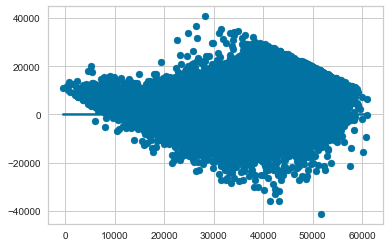

In [543]:
plt.scatter(y_predict, residuals)
plt.plot(y_predict, [0 for i in range(len(df_filtered))])
plt.show()

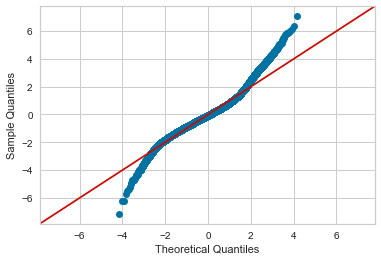

In [544]:
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

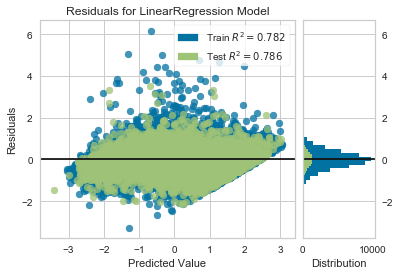

In [545]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create training and test sets



visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()